# Importing modules, loading file

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://www.sharkattackfile.net/spreadsheets/GSAF5.xls'
pd.set_option('display.max_columns', None)
df = pd.read_excel(url)

# Data Cleaning

In [ ]:
# 1. Lose PDF, source, location (and more) columns✅
# 2. Handle all the null✅
    # Year -> filling missing/value=0 with data from "Date" column
    # Year -> keeping only data from the last 77 years (75quantile)
    # Time and age replace by avg✅
# Delete rows with a majority of nulls✅
# 4.Check for duplicates✅
# 3.Format Data
# Creatign new column with "Month"


In [ ]:
#1. Lose PDF, source, location (and more) columns

columns_to_drop = ['Location', 'pdf', 'Source','href formula','Unnamed: 11','href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22']
df.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
# "Year"
# filling missing values (NaN and "0") with data from "Date"

print(f"Starting this process there were {sum(df['Year'] == 0.0)} values of 'Year' = 0.\n"
         f"And 'Year' had {df['Year'].isnull().sum()} NaN values.")

print(df['Year'].describe())

df["Date"] = df["Date"].apply(str) # transforming the "Date" to string to be able to manipulate it

substring  = ["BC", "B.C."] # deleting the rows that are B.C.
filter = df["Date"].str.contains('|'.join(substring))
df = df[~filter]

df = df[~((df["Date"] == "No date") & (df["Year"] == 0.0))] # deleting rows that have year=0 and date=no date

# adding to year (when year = 0) the 4 consecutive digids from Date
df.loc[df['Year'] == 0.0, 'Year'] = df.loc[df['Year'] == 0.0, 'Date'].str.extract(r'(\d{4})').values

# adding to year (when year = NaN) the 4 consecutive digids from Date
df.loc[df['Year'].isna(), 'Year'] = df.loc[df['Year'].isna(), 'Date'].str.extract(r'(\d{4})').values

print(f"Finishing this process there are {sum(df['Year'] == 0.0)} values of 'Year' = 0.\n"
        f"And 'Year' has {df['Year'].isnull().sum()} NaN values.\n"
        "The missing values were filled in from info from the 'Date' column.")



In [ ]:
# "Year"
# keeping only data from the last 77 years (75quantile)

print(f"Starting this process the dataframe has {df.shape[0]} rows.")

df.dropna(subset="Year",inplace=True) # deleting 3 rows with NaN yesr value ->looking at the data they also look to be around the world wars

df['Year'] = df['Year'].astype(int)

df = df[df['Year'] >= 1947]

print(f"After this process the dataframe has {df.shape[0]} rows.")

In [ ]:
#2. Handle all the null
df.isnull().sum()
df.isnull().any()
df.isnull().sum(axis=1)
df.dropna(how='all', inplace=True) #drop all rows with all of the values null (-24 rows)

# Convert 'Age' column to numeric type to ensure all values are numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
# Replace null values in the 'Age' column with the average age
df['Age'].fillna(df['Age'].mean(), inplace=True)

df['Time'] = pd.to_numeric(df['Time'], errors='coerce')
df['Time'].fillna(df['Time'].mean(), inplace=True)
df.dropna(subset=['Country'], inplace=True) #drop because we have only 50 NaN
df.dropna(subset=['Type'], inplace=True) #drop because we have only 16 NaN
df.dropna(subset=['Injury'], inplace=True) #drop because we have only 25 NaN
#df.dropna(thresh=10)#with 13 we have 3054 rows, 12 >> 5773, 11 >> 6555

In [ ]:
unique_values_per_column = {}
for col in df.columns:
    unique_values_per_column[col] = df[col].unique()

unique_values_per_column

In [ ]:
df['Sex'].value_counts()

In [ ]:
df.drop(df[~df['Sex'].isin(['M', 'F'])].index, inplace=True)
#This code filters the DataFrame to retain only rows where the 'Sex' column contains values 'M' or 'F',
#effectively removing rows with other values from the DataFrame.

In [ ]:
df['State'].fillna('undefined', inplace=True)
#This will replace all non-values in the 'state' column with the word 'undefined'
#because we don't need the states for our research and we can still use other values from the same row

In [ ]:
df['Species '].fillna('unknown', inplace=True)
#change all the non values of the species
#to 'unknow' because if we dropped them we would lose a significant part of our sample, which could
#compromise the credibility of our research.

In [ ]:
df['Activity'].fillna('unknown', inplace=True)

In [ ]:
#NaN values 'Name'

def generate_anonymous_label(counter):
    return f'anonymous{counter}'

# Initialize a counter
counter = 1

# Fill missing values in 'name' column with anonymous labels
df['Name'].fillna(value=lambda x: generate_anonymous_label(counter), inplace=True)

# Increment counter for next iteration
counter += 1

#Here we replace all the NaN values in the names with Anonimos1, 2, 3 etc.
#Because we don't need people's names for our research
# And we can still use the information in the other columns

In [ ]:
# Date -> new column Month

df['Month'] = df['Date'] # creating a new column for "Month"

# for date inputs that have seasons, adding the middle month of the season
df['Month'] = df['Month'].replace({"Fall":"October","Summer":"July","summer":"July","Nox":"November","Winter":"January","2017.06.05":"June","2008.01.30":"January","02-Ap-2001":"April"},regex=True)


# removing words in "Date" that don't offer much info, anf will mess up with the r pattern later
substring = ["Early","Reported","Before","Mid","Between","date","and","Late"]
for sub in substring:
    df['Month'] = df['Month'].str.replace(sub, '')

df['Month'] = df['Month'].str.extract(r'([A-Za-z]{3})')

df['Month'].isna().sum() # these NaN values, are mostly dates that had only year ( df.loc[df['Month'].isna()] )

# replacing the values are not months (checked) with NaN values
df['Month'] = df['Month'].replace({"sam":None,"Las":None,"Cir":None,"Pri":None,"Aft":None,"lat":None},regex=True)

df['Month'].value_counts() # July and August are the most active months

df.dropna(subset = "Month",inplace=True) # dropping NaN values, around 100+

print(f"There are {df['Month'].isnull().sum()} NaN values in 'Month'.")

There are 0 NaN values in 'Month'.


In [ ]:
print(df.duplicated().sum()) # no duplicated values
df.drop_duplicates(inplace=True)

0


In [ ]:
df.drop(['Date'], axis=1, inplace=True)

In [ ]:
df.drop(['Time'], axis=1, inplace=True)

In [ ]:
df.isnull().sum()

# Data Formatting

In [ ]:
#Formatting Data:

#Use round() and format() to format numeric values.
#Use f-strings, format() or % to format strings and use string methods like lower(), upper(), title(), strip(), split(), and replace().
#Cleaning Column Names:

#Use df.columns to access column names.
#Modify column names using df.columns or rename()

In [ ]:
df = df.applymap(lambda x: x.capitalize() if isinstance(x, str) else x)

In [ ]:
df['Age'] = df['Age'].astype(int) #passing age as integers, to remove decimals

In [ ]:
df.columns = df.columns.str.replace(' ', '') #remove extra space in 'species'

In [ ]:
df = df.sort_values(by='Year', ascending=False) #sort by year in descending order

# Reset Index

In [ ]:
df_final = df.reset_index(drop=True)

In [ ]:
df_final

,Year,Type,Country,State,Activity,Name,Sex,Age,Injury,Species,Month
0,2024,Unprovoked,India,Maharashtra,Fishing,Vicky suresh govari,M,32,Calf of lower left leg injured,"Bull shark, 7'",Feb
1,2024,Unprovoked,Australia,New south wales,Swimming,Lauren o'neill,F,29,Right leg bitten,Bull shark,Jan
2,2024,Unprovoked,Bahamas,Paradise island,Swimming,Male,M,10,Right leg injured,Unknown,Jan
3,2024,Unprovoked,Australia,South australia,Surfing,Murray adams,M,64,Leg bitten,White shark,Jan
4,2024,Provoked,South africa,Eastern cape province,Fishing,Male,M,62,Provoked incident. lacerations and puncture wo...,Raggedtooth shark,Jan
...,...,...,...,...,...,...,...,...,...,...,...
4611,1947,Unprovoked,Australia,Northern territory,Diving,A.s. festing,M,28,Suit ripped,"Most likely, a small shark",Jul
4612,1947,Unprovoked,South africa,Kwazulu-natal,Swimming,Keith daldorf,M,20,Right thigh lacerated,Unknown,Jul
4613,1947,Invalid,Greece,Carpathian sea,Jumped overboard,Nickolas doulis,M,28,Shark involvement unconfirmed,Questionable,Jul
4614,1947,Unprovoked,Kenya,Coast province,Swimming,Merchant seaman,M,28,Knee grazed,Unknown,May


# Dashboards

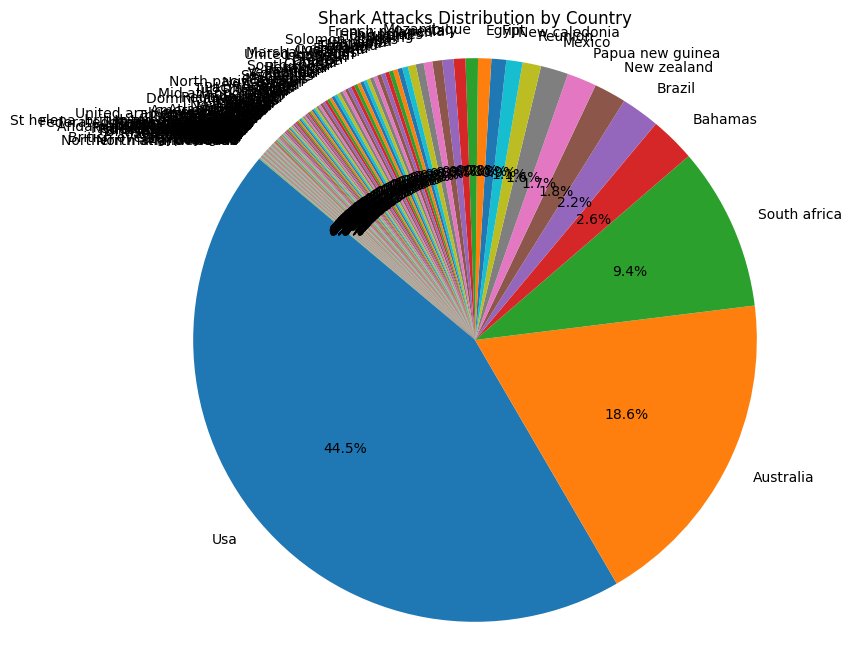

In [ ]:
# Get the counts of attacks for each country
df_country = df['Country'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_country.values, labels=df_country.index, autopct='%1.1f%%', startangle=140)
plt.title('Shark Attacks Distribution by Country')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

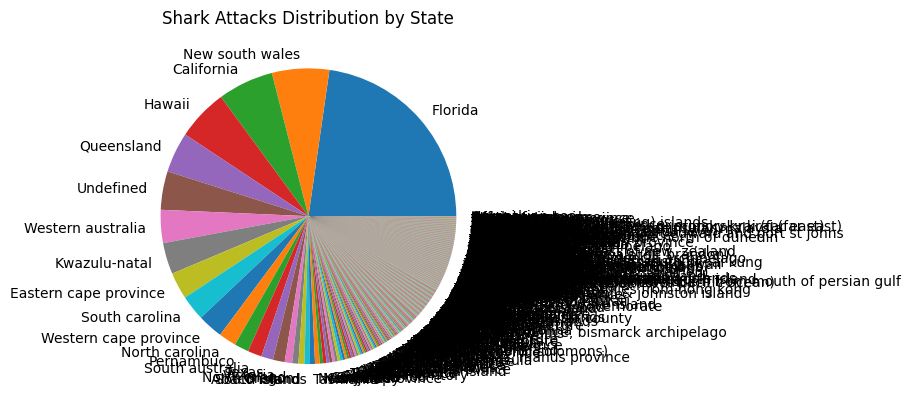

In [ ]:
# attacks by state
df_state = df['State'].value_counts()

plt.pie(df_state.values, labels=df_state.index)
plt.title('Shark Attacks Distribution by State')
plt.show()

In [ ]:
usa_df = df[df['Country'] == 'Usa']

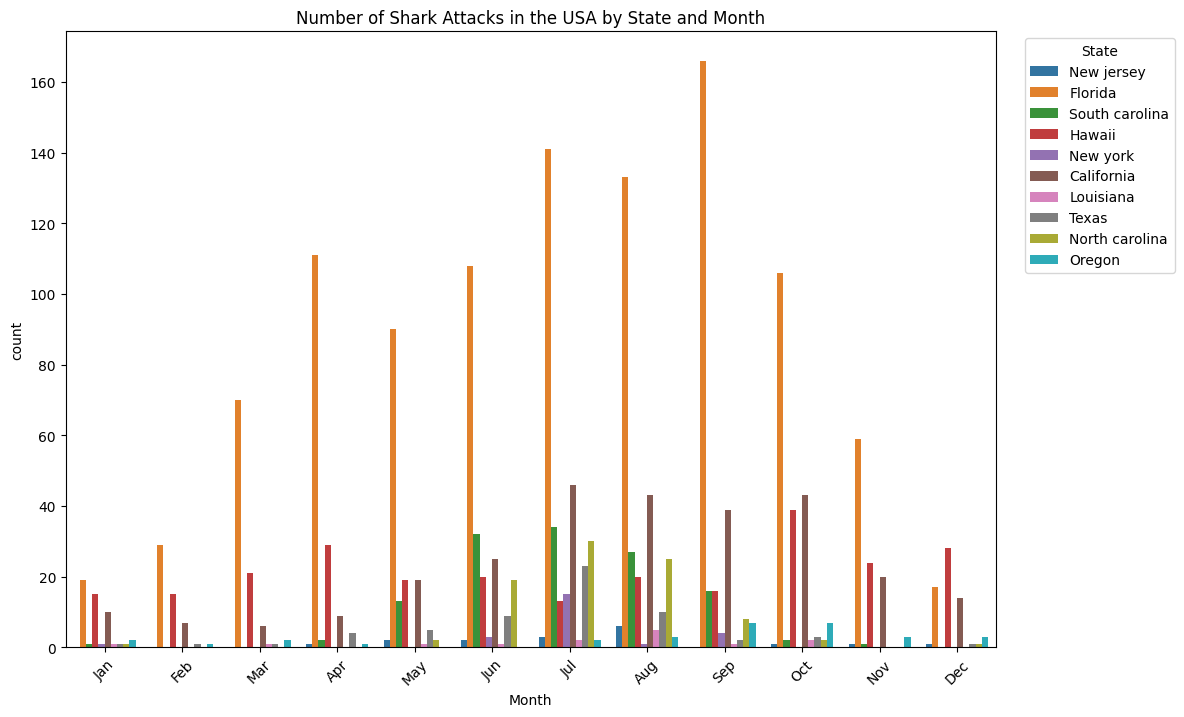

In [ ]:
# Extracting the top 10 states in USA by shark attack frequency

top_states = usa_df['State'].value_counts().head(10).index

# Filtering data for the top 10 states in USA
filtered_usa_df = usa_df[usa_df['State'].isin(top_states)]

# Visualizing the number of shark attacks in the USA by state
plt.figure(figsize=(12, 8))
sns.countplot(x='Month', hue='State', data=filtered_usa_df, order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Number of Shark Attacks in the USA by State and Month')
plt.xticks(rotation=45)
plt.legend(title='State', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


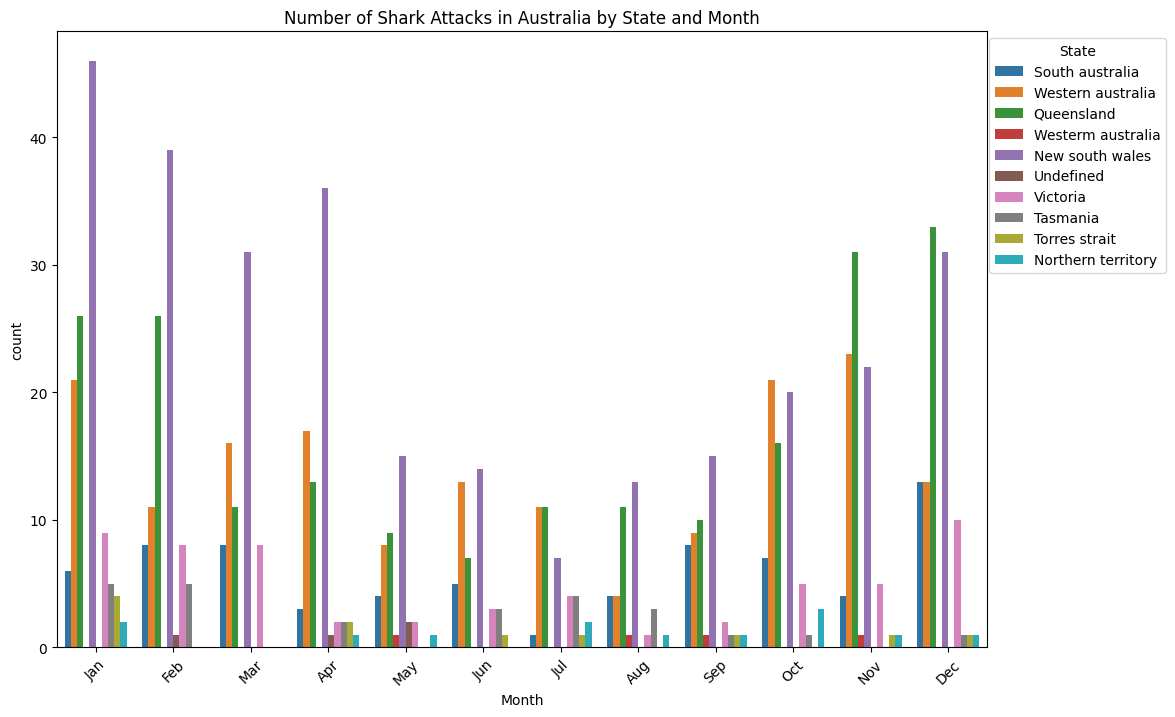

In [ ]:
# Filtering data for Australia
australia_df = df[df['Country'] == 'Australia']

# Extracting the top 10 states by shark attack frequency in Australia
top_states_australia = australia_df['State'].value_counts().head(10).index

# Filtering data for the top 10 states in Australia
filtered_australia_df = australia_df[australia_df['State'].isin(top_states_australia)]

# Visualizing the number of shark attacks in Australia by state
plt.figure(figsize=(12, 8))
sns.countplot(x='Month', hue='State', data=filtered_australia_df, order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Number of Shark Attacks in Australia by State and Month')
plt.xticks(rotation=45)
plt.legend(title='State', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()
